# Proyecto Python ML
En la primera parte de su proyecto ustedes deben hacer una interfaz interactiva explicando un algoritmo. La mejor manera es representar los datos y el proceso que realiza el algoritmo con alguna gráfica.

Aquí algunos ejemplos para gradiente de descenso, como podrán ver de los algoritmos que podían usar para su proyecto no está el gradiente de descenso pero espero les sirvan algunas cosas del archivo por el tipo de gráficas usadas.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from sklearn.datasets.samples_generator import make_regression 

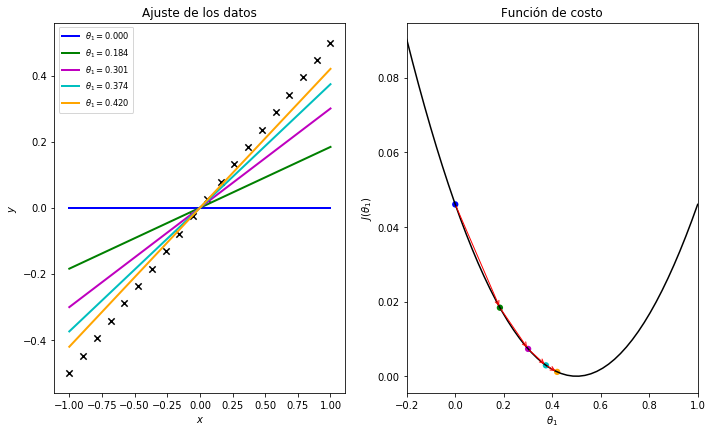

In [2]:
#Primero realizaremos la visualización de una función de costo de una theta
m = 20 #número de datos
x = np.linspace(-1,1,m)
theta1_true = 0.5
y = theta1_true * x

# Haremos dos gráficas entonces determinamos subplots con una fila y dos columnas
#ax[0] corresponde a la gráfica de la izquierda del ajuste de los datos
#ax[1] corresponde a la figura de la derecha donde veremos la función de costo y como se fue explorando cada iteración
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def funcionDeCosto(theta1):
    #La función de costo J(theta1)
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-funcionDeHipotesis(x, theta1))**2, axis=1)/2

def funcionDeHipotesis(x, theta1):
    #Nuestra función de hipotesis es una línea recta
    return theta1*x

# Creamos vectores con los que podremos evaluar nuestras funciones
vectorTheta1 = np.linspace(-0.2,1,50)
vectorJ = funcionDeCosto(vectorTheta1[:,np.newaxis]) 

# The cost function as a function of its single parameter, theta1.
ax[1].plot(vectorTheta1, vectorJ, 'k')

N = 5 #Número de pasos = 5
alpha = 1 #Tasa de aprendizaje = 1
theta1 = [0] #Inicializamos vector de theta con valor 0
J = [funcionDeCosto(theta1[0])[0]]
#La siguiente parte corresponde al descenso del gradiente donde iteramos y vamos cambiando el valor de theta
for j in range(N-1):
    theta1Anterior = theta1[-1]
    theta1Actual = theta1Anterior - alpha / m * np.sum(
                                    (funcionDeHipotesis(x, theta1Anterior) - y) * x)
    theta1.append(theta1Actual)
    J.append(funcionDeCosto(theta1Actual))

#Gráfica 1: Ajuste de datos
colors = ['b', 'g', 'm', 'c', 'orange'] #Creamos un vector de colores para luego iterar y asignar un color diferente
#Cuando theta= 0:
ax[0].plot(x, funcionDeHipotesis(x, theta1[0]), color=colors[0], lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0])) #$\theta_1 corresponde al símbolo theta subíndice 1
#Para no hacer manualmente cada línea creamos un ciclo for en el que iteraremos colores y los valores de theta
for j in range(1,N):
    #Creamos la línea que daría el valor de theta que exploro en cierta iteración el gradiente.
    ax[0].plot(x, funcionDeHipotesis(x, theta1[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))
    #IMPORTANTE, chequen el siguiente código porque arrowprops les será útil para su proyecto
    #Ahora para la gráfica 2 crearemos flechas entre valor del costo de cada theta
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]), #El primer parámetro corresponde a una etiqueta
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

# Ahora asinaremos títulos y etiquetas para que se puedan interpretar mejor nuestras gráfica
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Función de costo')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Ajuste de los datos')
ax[0].legend(loc='upper left', fontsize='small')

plt.tight_layout() #Sirve para justar las subplots al tamaño de la figura
plt.show()

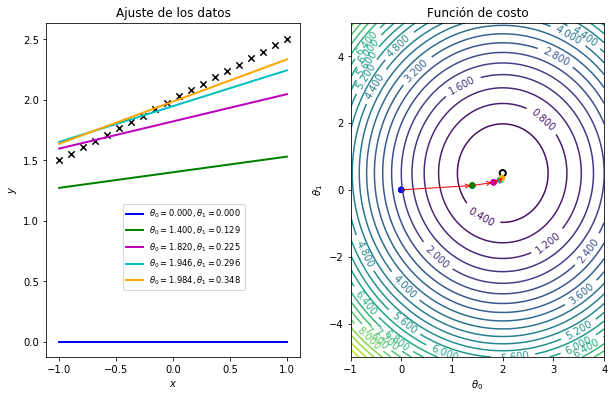

In [5]:
#Ahora realizaremos la visualización de la función de costo cuando se evaluan dos thetas
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def funcionDeCosto2(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-funcionDeHipotesis2(x, theta0, theta1))**2, axis=2)/2

def funcionDeHipotesis2(x, theta0, theta1):
    #Nuestra hipotesis sigue siendo una línea recta pero ahora tenemos theta 0 que será el valor donde intersecta una vez que x=0
    return theta0 + theta1*x

#Creamos los vectores de theta y creamos el vector de J usando dichos parámetros theta
vectorTheta0 = np.linspace(-1,4,101)
vectorTheta1 = np.linspace(-5,5,101)
vectorJ = funcionDeCosto2(vectorTheta0[np.newaxis,:,np.newaxis],
                   vectorTheta1[:,np.newaxis,np.newaxis])


X, Y = np.meshgrid(vectorTheta0, vectorTheta1)
#IMPORTANTE, otra función importante es contours de visualizar superficies tridimensionales
contours = ax[1].contour(X, Y, vectorJ, 30)
ax[1].clabel(contours)
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])


N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [funcionDeCosto2(*theta[0])[0]]
for j in range(N-1):
    thetaAnterior = theta[-1]
    thetaActual = np.empty((2,))
    thetaActual[0] = thetaAnterior[0] - alpha / m * np.sum(
                                    (funcionDeHipotesis2(x, *thetaAnterior) - y))
    thetaActual[1] = thetaAnterior[1] - alpha / m * np.sum(
                                    (funcionDeHipotesis2(x, *thetaAnterior) - y) * x)
    theta.append(thetaActual)
    J.append(funcionDeCosto2(*thetaActual))


#Empezaremos a plotear como la vez anterior
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, funcionDeHipotesis2(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    #Mostraremos los modelos según van variando los parámetros theta
    ax[0].plot(x, funcionDeHipotesis2(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
    #En la segunda usaremos flechas sobre los contornos así que nos dirá como se exploro
    #la superficie tridimensional de la función de costo cada iteración
    ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

# Asignamos titulos y etiquetas
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Función de costo')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Ajuste de los datos')
axbox = ax[0].get_position()
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

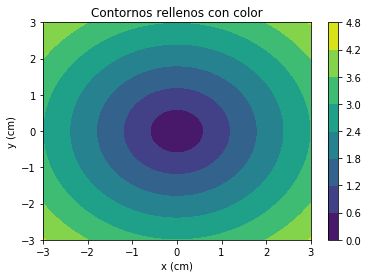

In [7]:
#Gráficos de Contour o gráficos de nivel, otro ejemplo
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Crea la barra de colores
ax.set_title('Contornos rellenos con color')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

Gradiente de descenso: -3.73, 82.80 73
Minimos cuadrados: -3.71, 82.90


Text(0.5, 0.98, 'Minimizando J($\\theta_0$,$\\theta_1$)')

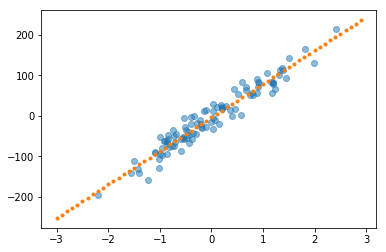

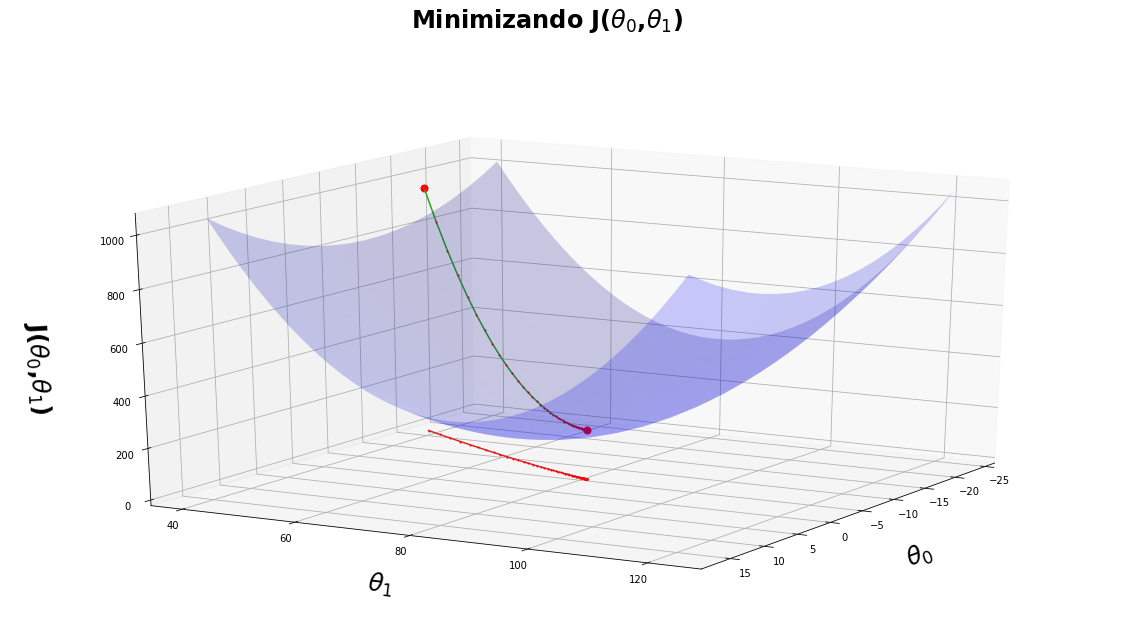

In [26]:
#Por último veremos un poco de como trabajar con 3D
#Usaremos la función de sklearn para hacer la regresión
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten() #Crea una copia del del vector colapsado a una dimensión
slope, intercept, _,_,_ = stats.linregress(x,y)
mejorAjuste = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
vectorDatos = np.arange(-3,3,0.1)
plt.plot(vectorDatos,mejorAjuste(vectorDatos), '.')

def gradienteDeDescenso(x, y, thetaInicio, alfa=0.001, maxsteps=0, E=0.001, ):
    costos = []
    m = y.size # number of data points
    theta = thetaInicio
    historialThetas = [] # to store all thetas
    preds = []
    contador = 0
    costoAnterior = 0
    pred = np.dot(x, theta)
    error = pred - y 
    costoActual = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costos.append(costoActual)
    historialThetas.append(theta)
    contador+=1
    while abs(costoActual - costoAnterior) > E:
        costoAnterior=costoActual
        gradiente = x.T.dot(error)/m 
        theta = theta - alfa * gradiente  
        historialThetas.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        costoActual = np.sum(error ** 2) / (2 * m)
        costos.append(costoActual)
        
        if contador % 25 == 0: preds.append(pred)
        contador+=1
        if maxsteps:
            if contador == maxsteps:
                break
        
    return historialThetas, costos, preds, contador
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
historialThetas, costo, preds, iters = gradienteDeDescenso(xaug, y, theta_i, alfa=0.1)
theta = historialThetas[-1]
print("Gradiente de descenso: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Minimos cuadrados: {:.2f}, {:.2f}".format(intercept, slope))


from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel(r'$\theta_0$', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel(r'$\theta_1$', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('J('+r'$\theta_0$,'+r'$\theta_1$)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle('Minimizando J('+r'$\theta_0$,'+r'$\theta_1$)', fontsize=24, fontweight='bold')